In [74]:
# Importing libraries.
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

In [40]:
# Function to read data based on file extension.
def read_data(file_path):
    _ , file_ext = os.path.splitext(file_path)
    if file_ext == '.csv':
        return pd.read_csv(file_path)
    elif file_ext == '.json':
        return pd.read_json(file_path)
    elif file_ext in ['.xls', '.xlsx']:
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unknown file format")

In [41]:
# Reading the dataset.
file_path = "predictive_maintenance.csv"
df = read_data(file_path)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [42]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [43]:
# Shape of the data.
df.shape

(10000, 10)

In [44]:
# Data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [45]:
# Describing the data.
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [46]:
# Converting columns to list.
df.columns.tolist()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [47]:
# Missing values.
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [48]:
# Checking duplicate values.
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [49]:
# Dropping 'UDI', 'Target' and 'Product ID' columns.
df.drop(columns=['UDI', 'Product ID', 'Target'], axis=1, inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [50]:
# Cleaning columns names.
columns_to_rename = {
    'Air temperature [K]' : 'Air_Temp', 
    'Process temperature [K]' : 'Process_Temp', 
    'Rotational speed [rpm]' : 'Rotational_speed', 
    'Torque [Nm]' : 'Torque', 
    'Tool wear [min]' : 'Tool_Wear', 
    'Failure Type' : 'Failure_Type'
}
df.rename(columns=columns_to_rename, inplace=True)
df.head()


,Type,Air_Temp,Process_Temp,Rotational_speed,Torque,Tool_Wear,Failure_Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


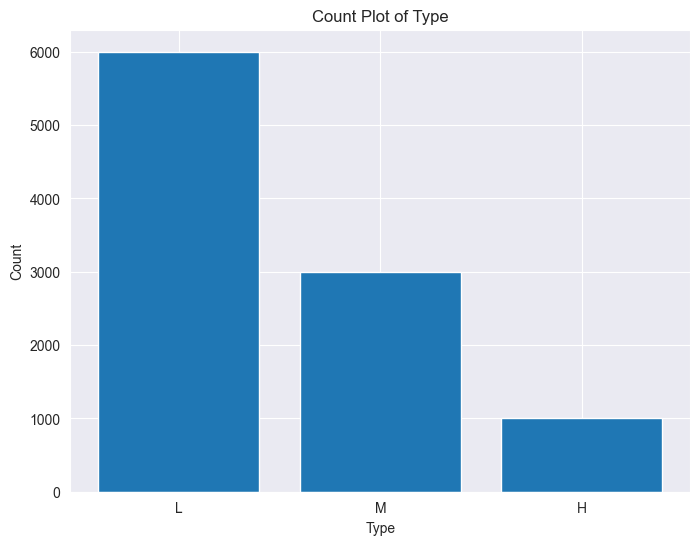

In [51]:
# Calculating 'Type' counts.
type_counts = df['Type'].value_counts()

# Using Matplotlib to create a count plot. 
plt.figure(figsize=(8, 6)) 
plt.bar(type_counts.index, type_counts) 
plt.title('Count Plot of Type') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show() 

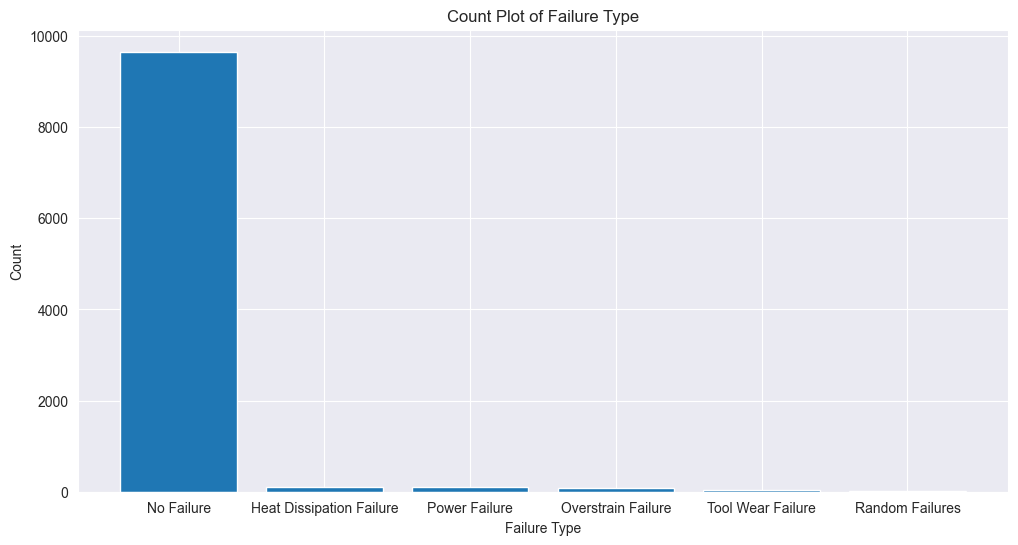

In [52]:
# Calculating ' Failure Type' counts.
failure_type_counts = df['Failure_Type'].value_counts()

# Using Matplotlib to create a count plot. 
plt.figure(figsize=(12, 6)) 
plt.bar(failure_type_counts.index, failure_type_counts) 
plt.title('Count Plot of Failure Type') 
plt.xlabel('Failure Type') 
plt.ylabel('Count') 
plt.show()


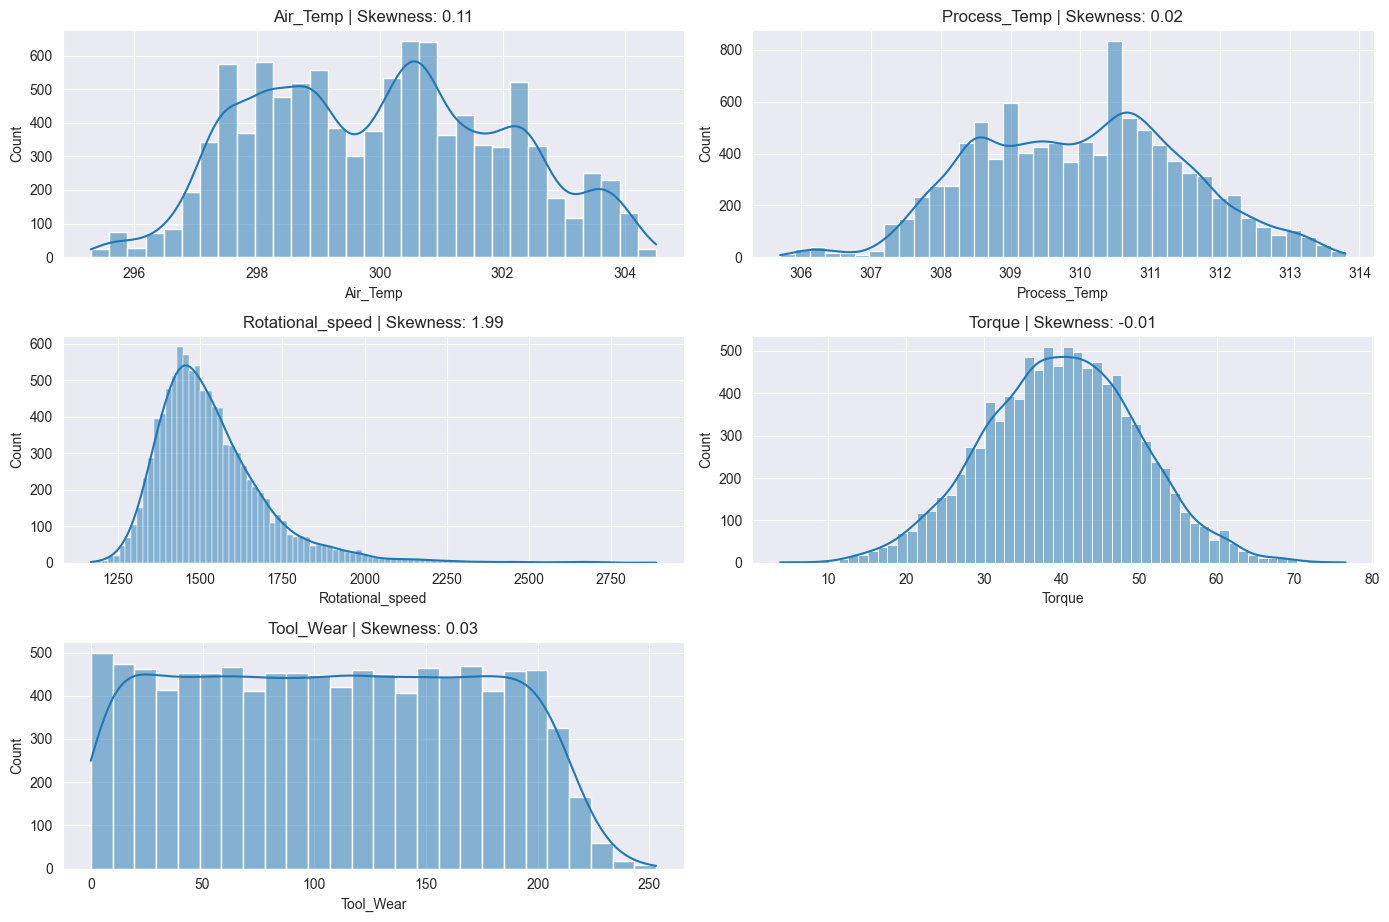

In [53]:
# Setting out seaborn style.
sns.set_style('darkgrid')

# Identifying numerical columns.
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns 
  
# Plotting distribution of each numerical feature. 
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
    plt.subplot(len(numerical_columns), 2, idx) 
    sns.histplot(df[feature], kde=True) 
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}") 
  
# Adjusting layout and showing plots. 
plt.tight_layout() 
plt.show() 

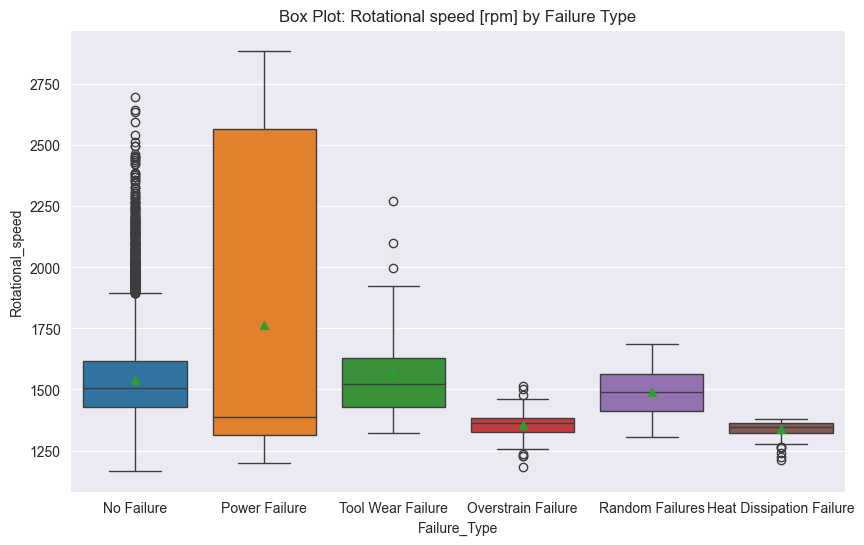

In [54]:
# Exploring Rotational speed vs Failure Type using box plots. 
plt.figure(figsize=[10,6])
sns.boxplot(
    data=df, x='Failure_Type', 
    y='Rotational_speed', 
    showmeans=True, 
    hue='Failure_Type'
)
plt.title("Box Plot: Rotational speed [rpm] by Failure Type")
plt.show()

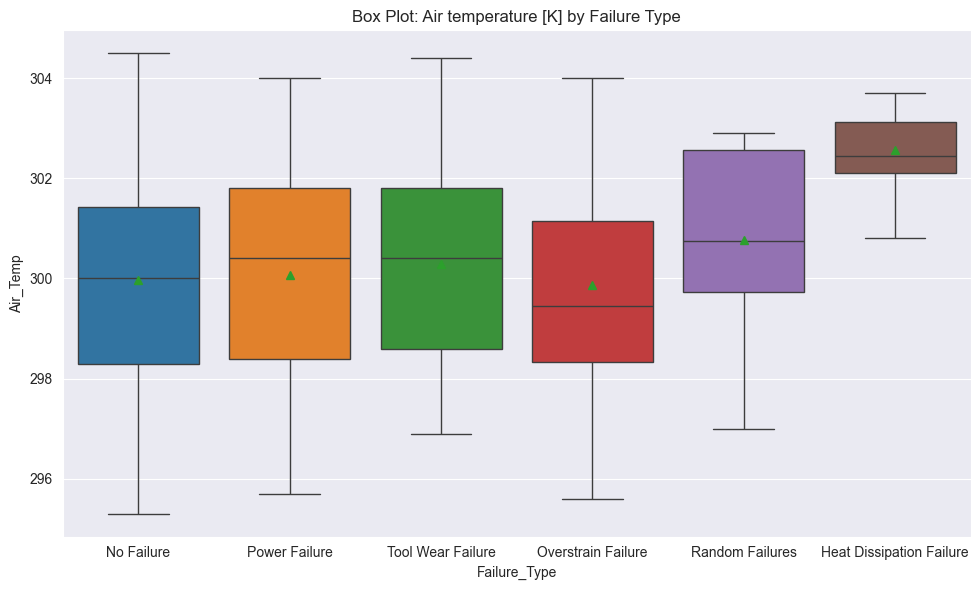

In [55]:
# Exploring Air temperature vs Failure Type using box plots. 
plt.figure(figsize=[10,6])
sns.boxplot(
    data=df, 
    x='Failure_Type', 
    y='Air_Temp', 
    showmeans=True, 
    hue='Failure_Type'
)
plt.title("Box Plot: Air temperature [K] by Failure Type")
plt.tight_layout()
plt.show()

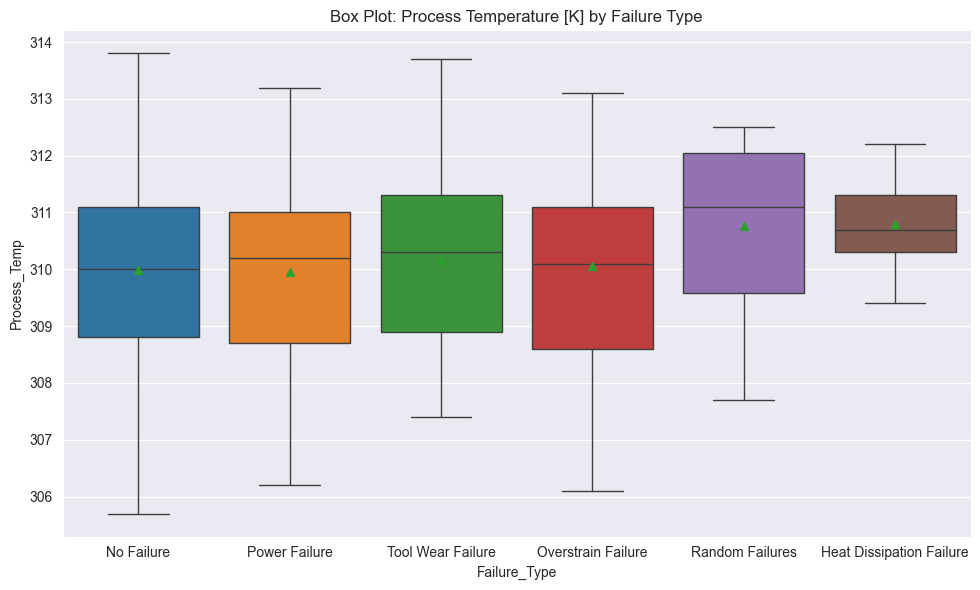

In [56]:
# Exploring Air temperature vs Failure Type using box plots. 
plt.figure(figsize=[10,6])
sns.boxplot(
    data=df, 
    x='Failure_Type', 
    y='Process_Temp', 
    showmeans=True, 
    hue='Failure_Type'
)
plt.title("Box Plot: Process Temperature [K] by Failure Type")
plt.tight_layout()
plt.show()

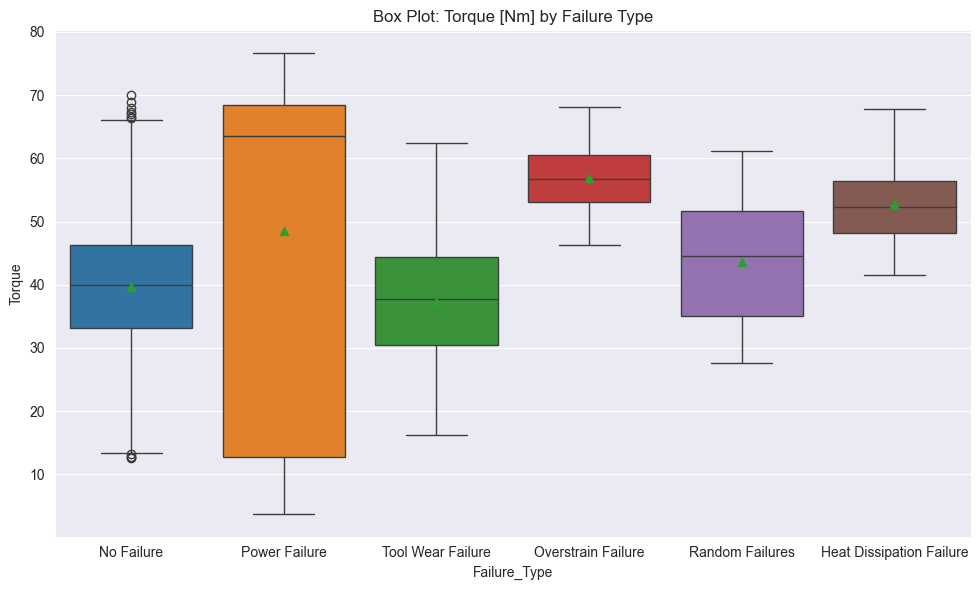

In [57]:
# Exploring Air temperature vs Failure Type using box plots. 
plt.figure(figsize=[10,6])
sns.boxplot(
    data=df, 
    x='Failure_Type', 
    y='Torque', 
    showmeans=True, 
    hue='Failure_Type'
)
plt.title("Box Plot: Torque [Nm] by Failure Type")
plt.tight_layout()
plt.show()

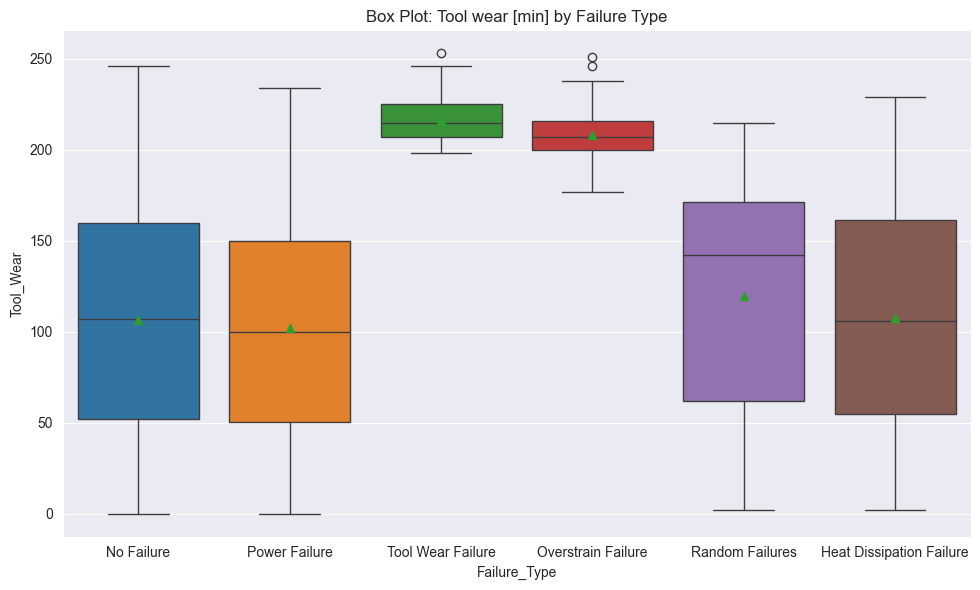

In [58]:
# Exploring Air temperature vs Failure Type using box plots. 
plt.figure(figsize=[10,6])
sns.boxplot(
    data=df, 
    x='Failure_Type', 
    y='Tool_Wear', 
    showmeans=True, 
    hue='Failure_Type'
)
plt.title("Box Plot: Tool wear [min] by Failure Type")
plt.tight_layout()
plt.show()

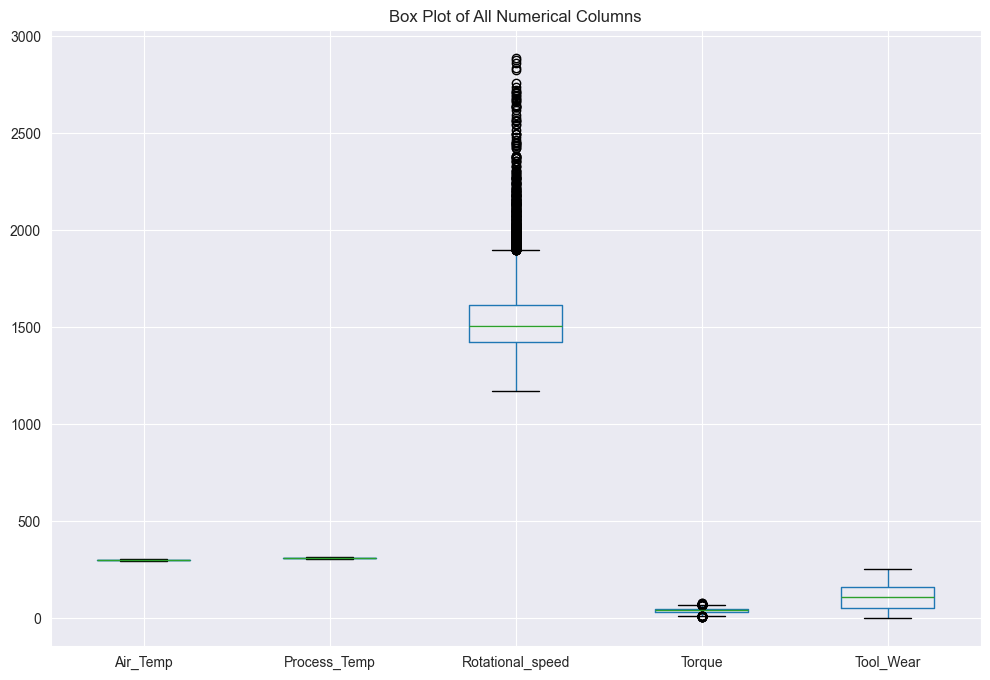

In [59]:
# Checking outliers for all other numerical columns.
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of All Numerical Columns')
plt.show()

In [60]:
# Handlling outliers in 'Rotational speed' column using winsorization.
rotational_q1 = df['Rotational_speed'].quantile(0.25)

rotational_q3 = df['Rotational_speed'].quantile(0.75)

rotational_iqr = rotational_q3 - rotational_q1

rotational_lower_bound = rotational_q1 - 1.5 * rotational_iqr

rotational_upper_bound = rotational_q3 + 1.5 * rotational_iqr

df['Rotational_speed'] = np.where(df['Rotational_speed'] < rotational_lower_bound, rotational_lower_bound,
                        np.where(df['Rotational_speed'] > rotational_upper_bound, rotational_upper_bound, df['Rotational_speed']))

In [61]:
# Handlling outliers in 'Torque [Nm]' column using winsorization.
torque_q1 = df['Torque'].quantile(0.25)

torque_q3 = df['Torque'].quantile(0.75)

torque_iqr = torque_q3 - torque_q1

torque_lower_bound = torque_q1 - 1.5 * torque_iqr

torque_upper_bound = torque_q3 + 1.5 * torque_iqr

df['Torque'] = np.where(df['Torque'] < torque_lower_bound, torque_lower_bound,
                        np.where(df['Torque'] > torque_upper_bound, torque_upper_bound, df['Torque']))

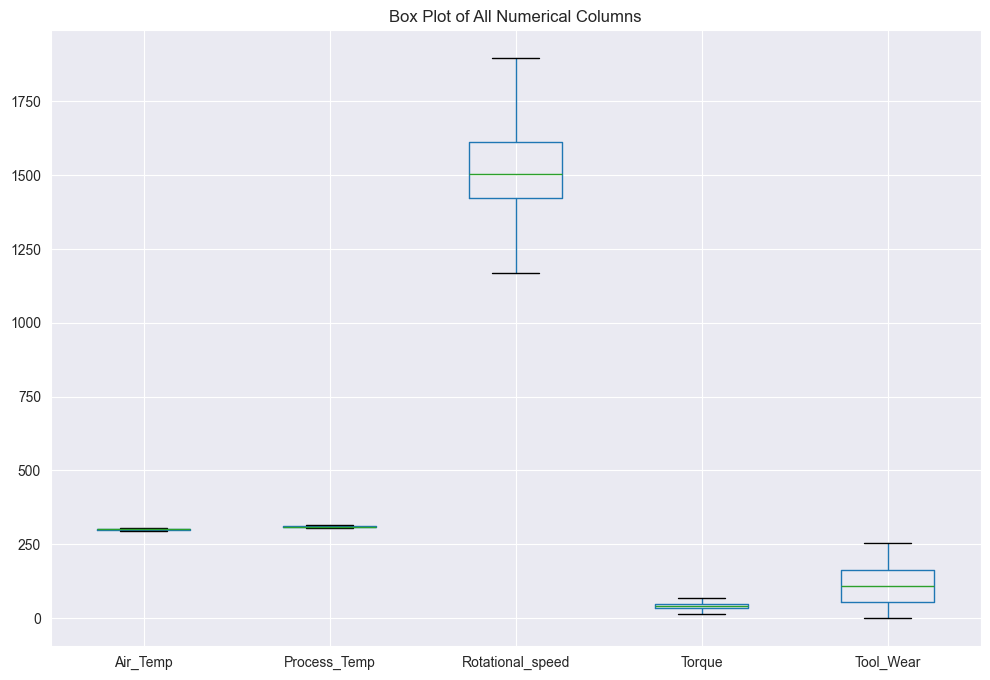

In [62]:
# Checking outliers for all other numerical columns again.
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of All Numerical Columns')
plt.show()

In [63]:
df.columns

Index(['Type', 'Air_Temp', 'Process_Temp', 'Rotational_speed', 'Torque',
       'Tool_Wear', 'Failure_Type'],
      dtype='object')

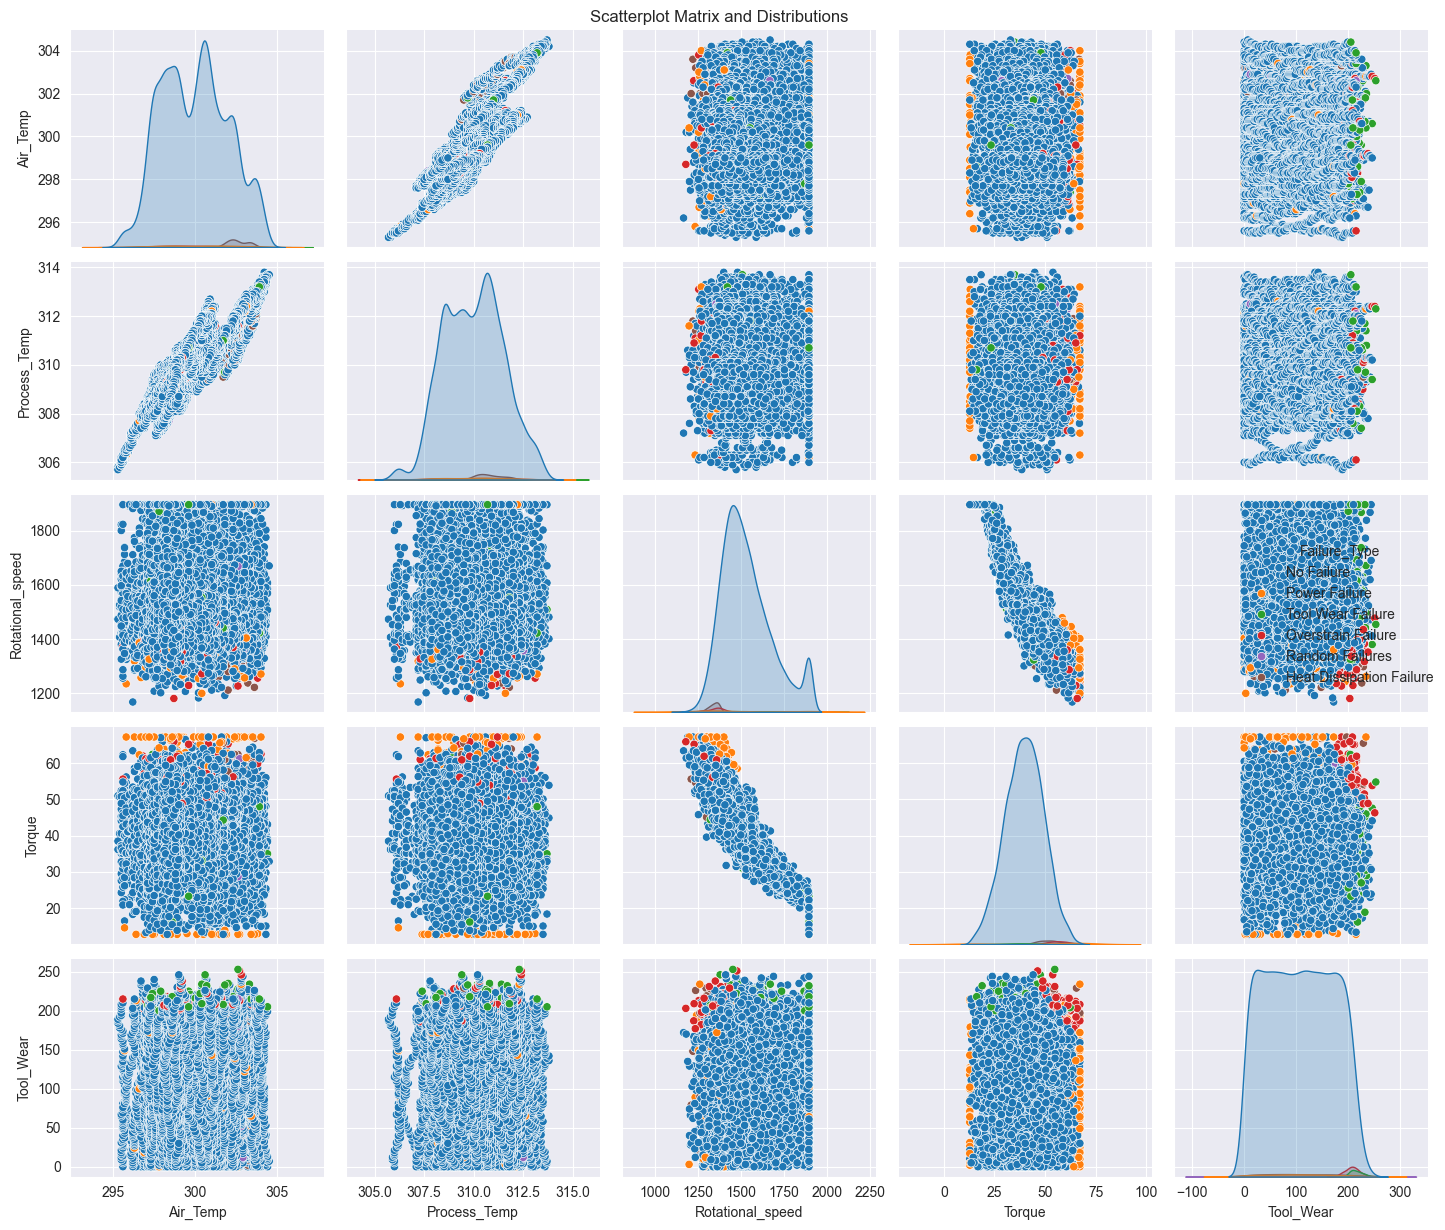

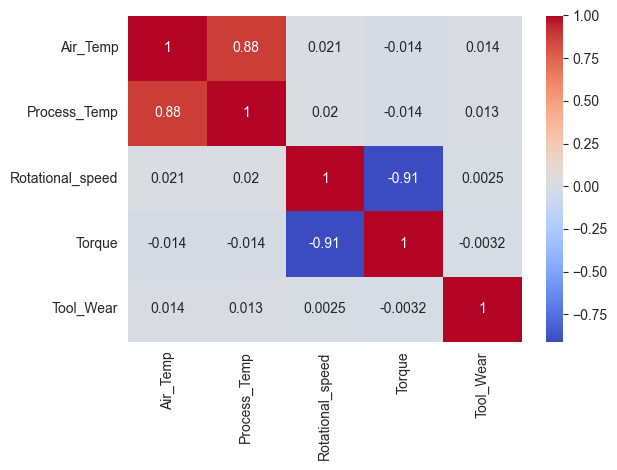

In [64]:
# Using Seaborn to create a pair plot.  
sns.pairplot(df, hue='Failure_Type', diag_kind='kde') 
plt.suptitle("Scatterplot Matrix and Distributions") 
plt.tight_layout()
plt.show()

# Selecting only numerical columns (int and float).
numerical_columns = df.select_dtypes(include=['number'])

# Correlation Matrix for numerical columns.
corr_matrix = numerical_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [65]:
# Exploring unique values in the 'Failure Type' column.
df['Failure_Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [66]:
df.head()

,Type,Air_Temp,Process_Temp,Rotational_speed,Torque,Tool_Wear,Failure_Type
0,M,298.1,308.6,1551.0,42.8,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3,No Failure
2,L,298.1,308.5,1498.0,49.4,5,No Failure
3,L,298.2,308.6,1433.0,39.5,7,No Failure
4,L,298.2,308.7,1408.0,40.0,9,No Failure


In [67]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [68]:
# 'Type' column with values low, medium, and high is an ordinal column. 
# These values represent categories with a clear and natural order.
# L < M < H
# This order makes it suitable for ordinal encoding.

# Definning the order of categories.
categories = [['L', 'M', 'H']]

# Initialising the OrdinalEncoder with the categories order.
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the 'Type' column.
df['Type_Encoded'] = encoder.fit_transform(df[['Type']])
df.head()

,Type,Air_Temp,Process_Temp,Rotational_speed,Torque,Tool_Wear,Failure_Type,Type_Encoded
0,M,298.1,308.6,1551.0,42.8,0,No Failure,1.0
1,L,298.2,308.7,1408.0,46.3,3,No Failure,0.0
2,L,298.1,308.5,1498.0,49.4,5,No Failure,0.0
3,L,298.2,308.6,1433.0,39.5,7,No Failure,0.0
4,L,298.2,308.7,1408.0,40.0,9,No Failure,0.0


In [69]:
# Applying one-hot encoding to the Failure_Type column.
one_hot_encoded = pd.get_dummies(
    df['Failure_Type'], 
    prefix='Failure'
).astype('float16')
one_hot_encoded.head()

,Failure_Heat Dissipation Failure,Failure_No Failure,Failure_Overstrain Failure,Failure_Power Failure,Failure_Random Failures,Failure_Tool Wear Failure
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
# Dropping Type column and Failure Type column.
df.drop(columns=['Type', 'Failure_Type'], inplace=True)
df.head()

,Air_Temp,Process_Temp,Rotational_speed,Torque,Tool_Wear,Type_Encoded
0,298.1,308.6,1551.0,42.8,0,1.0
1,298.2,308.7,1408.0,46.3,3,0.0
2,298.1,308.5,1498.0,49.4,5,0.0
3,298.2,308.6,1433.0,39.5,7,0.0
4,298.2,308.7,1408.0,40.0,9,0.0


In [71]:
# Scalling using Standard scaler because the distribution of variables 
# are approximately follow a Gaussian distribution.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Converting scaled data back to DataFrame for inspection.
scaled_data_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data_df.head()

,Air_Temp,Process_Temp,Rotational_speed,Torque,Tool_Wear,Type_Encoded
0,-0.952389,-0.947360,0.140180,0.284091,-1.695984,0.744413
1,-0.902393,-0.879959,-0.820899,0.637122,-1.648852,-0.745307
2,-0.952389,-1.014761,-0.216024,0.949807,-1.617430,-0.745307
3,-0.902393,-0.947360,-0.652879,-0.048768,-1.586009,-0.745307
4,-0.902393,-0.879959,-0.820899,0.001665,-1.554588,-0.745307


In [72]:
# Selecting independent variabels and dependent variables.
X = scaled_data_df
y = one_hot_encoded

In [75]:
# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)